# Highlight of features that affect Prosper loan amount
## by Johnmicheal Uzendu


## Investigation Overview

The main focus of this investigation was to find out features that affected the original loan amount and listing category distribution across states. 


## Dataset Overview

The dataset consists of information regarding 113,937 loans with 81 variables on each loan. Only fourteen of those variables were used during analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


#set global size for matplotlib figures 
matplotlib.rcParams['figure.figsize'] = (20, 8)

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df = df[['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperScore', 
         'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
         'IncomeRange', 'TotalProsperLoans', 'LoanOriginalAmount', 'MonthlyLoanPayment']]

# change ListingCreationDate to type datetime
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

## Loan Amount Distribution
The loan amount ranges from \\$1k to \\$35k with average amount hovering around \\$8k. Plotted on a standard scale with bin size of \\$1k, we see frequency upticks around \\$4k, \\$10k and \\$16k. 

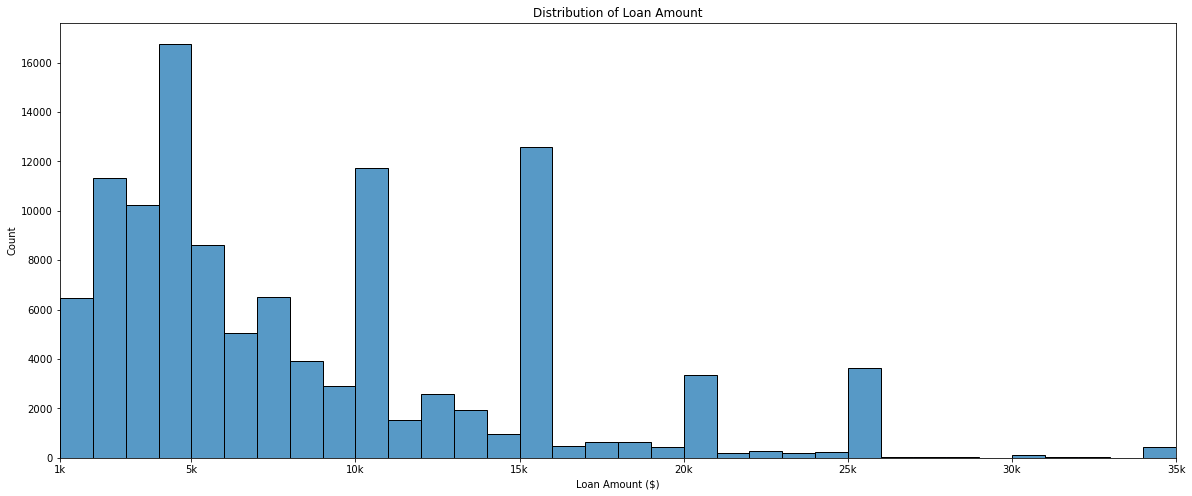

In [4]:
# start with a standard-scaled plot
binsize = 1000
bins = np.arange(df.LoanOriginalAmount.min(), df['LoanOriginalAmount'].max()+binsize, binsize)

sb.histplot(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([1000, 35000])
plt.xticks([1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], ['1k', '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

## Income Range Frequency Distribution
Majority of loans were given to  income earners around the range of \\$25k to \\$75k

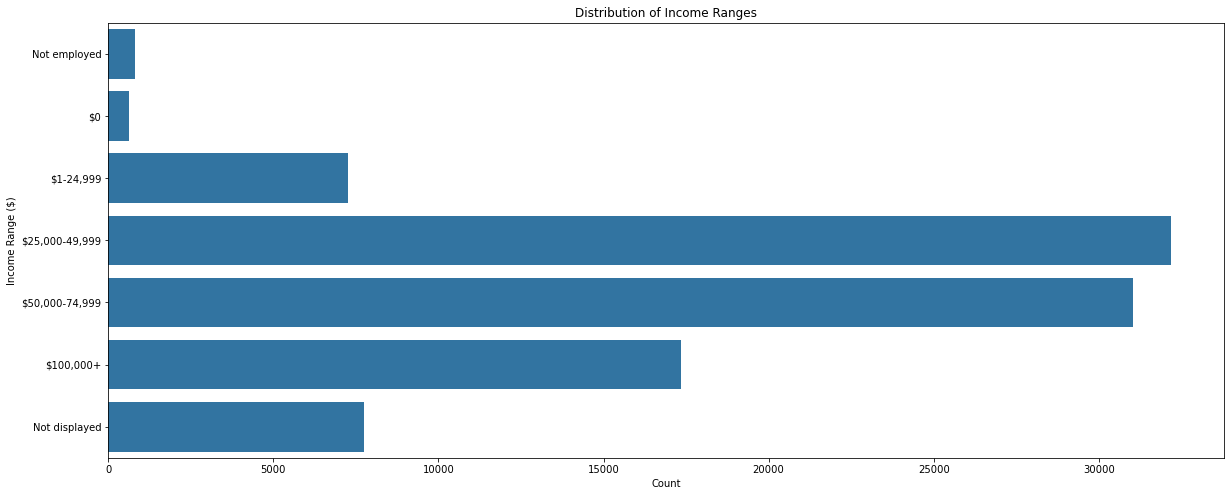

In [5]:
income_range_order = ['Not employed', '$0', '$1-24,999', 
                      '$25,000-49,999', '$50,000-74,999', '$100,000+', 'Not displayed']
sb.countplot(data=df, y = 'IncomeRange', color=sb.color_palette()[0], order=income_range_order, orient='h')
plt.ylabel('Income Range ($)');
plt.xlabel('Count');
plt.title('Distribution of Income Ranges');

## Borrower State Distribution
California (CA) has the highest count followed not so closely by Newyork (NY), Texas (TX) and Florida (FL).

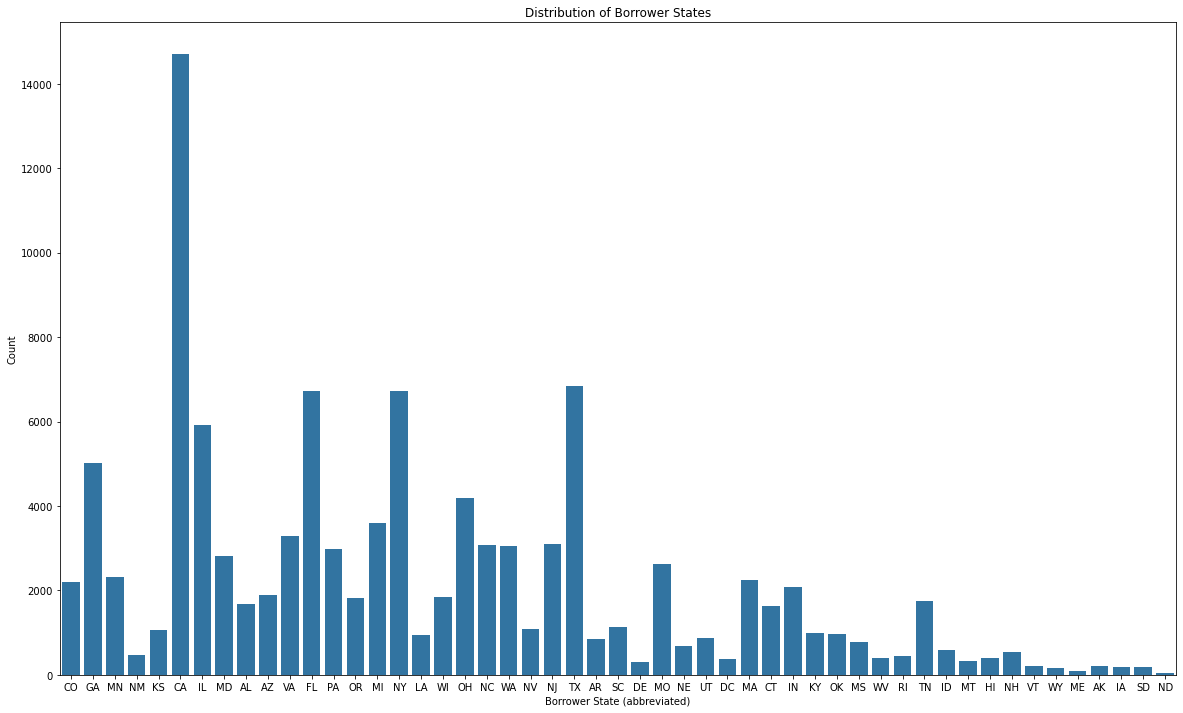

In [6]:
plt.figure(figsize=[20,12])
sb.countplot(data=df, x='BorrowerState', color=sb.color_palette()[0])
plt.xlabel('Borrower State (abbreviated)');
plt.ylabel('Count');
plt.title('Distribution of Borrower States');

## Listing Category Distribution
Debt consolidation, represented by number 1,  was the major reason for loan collection.

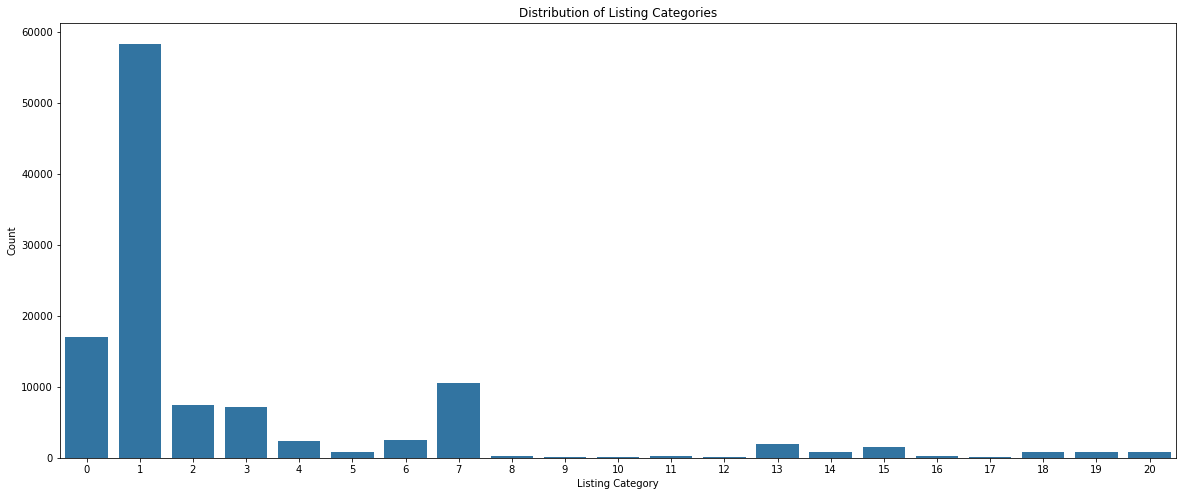

In [7]:
sb.countplot(data=df, x='ListingCategory (numeric)', color=sb.color_palette()[0]) 
plt.xlabel('Listing Category');
plt.ylabel('Count');
plt.title('Distribution of Listing Categories');

## Income Range Vs Loan Amount
The higher the income, the higher the amount of loan one can access.

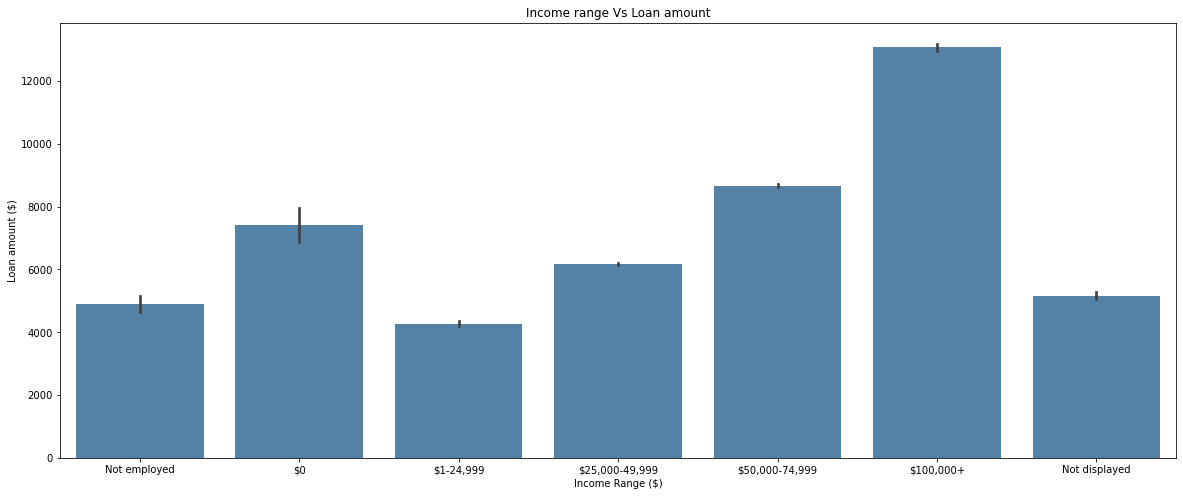

In [8]:
sb.barplot(data = df, x = 'IncomeRange', y='LoanOriginalAmount', palette=['steelblue'], order=income_range_order)
plt.title('Income range Vs Loan amount')
plt.xlabel('Income Range ($)')
plt.ylabel('Loan amount ($)');

## Listing category by borrower state and its frequency
California peaked the charts in the debt consolidation group represented by number 1

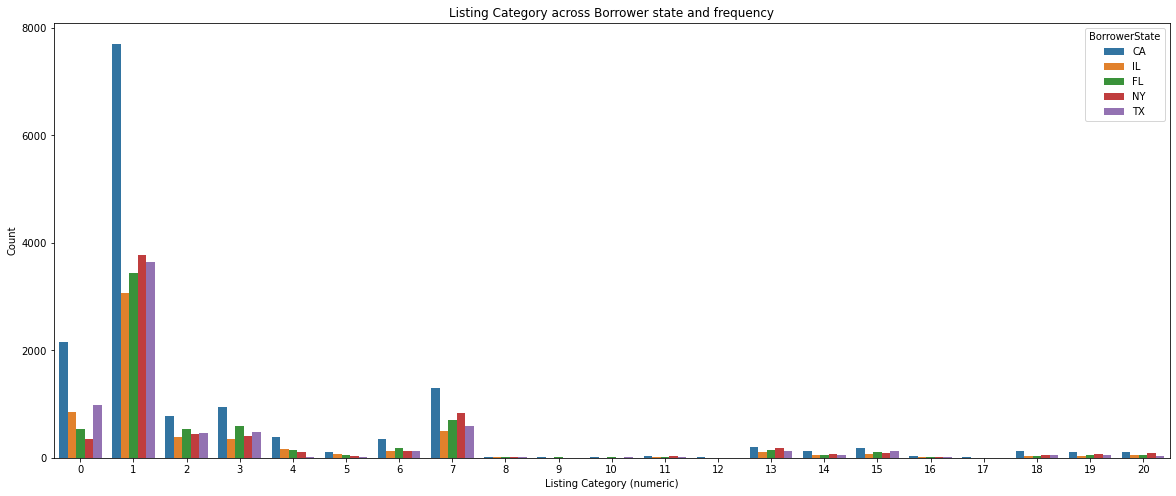

In [9]:
#select non null values of listing category and borrower state
df_select = df.loc[(-df['ListingCategory (numeric)'].isnull()) & (-df.BorrowerState.isnull())]

#get the unique states
states = df_select.BorrowerState.value_counts().index
data = df_select.loc[(df_select.BorrowerState.isin(list(['CA', 'TX', 'NY', 'FL', 'IL'])))]
sb.countplot(data=data, x='ListingCategory (numeric)', hue = 'BorrowerState')
plt.yticks(range(0,10000, 2000), [i for i in range(0,10000, 2000)])
plt.title('Listing Category across Borrower state and frequency')
plt.xlabel('Listing Category (numeric)')
plt.ylabel('Count');